In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

# Reading Data

In [2]:
#Read the Data
titanic = pd.read_csv("titanic1.csv")
titanic 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Preprocessing

In [3]:
#Displaying information about the data such as (data types , column name , memory usage ,...)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Describing the data (knowing the min , max , mean , ...)
titanic.describe().round(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.4,2.3,29.7,0.5,0.4,32.2
std,257.4,0.5,0.8,14.5,1.1,0.8,49.7
min,1.0,0.0,1.0,0.4,0.0,0.0,0.0
25%,223.5,0.0,2.0,20.1,0.0,0.0,7.9
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.5
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.3


In [5]:
#count of missing values
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

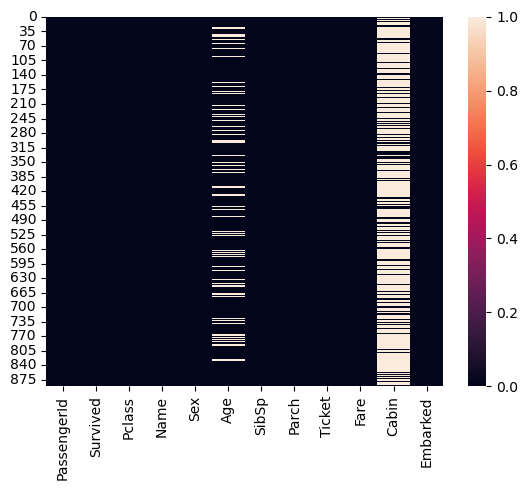

In [6]:
#visualize the missing values
sns.heatmap(titanic.isna())

In [7]:
#fill the missing values in column named (Age) with the mean of this column 
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())

<Axes: >

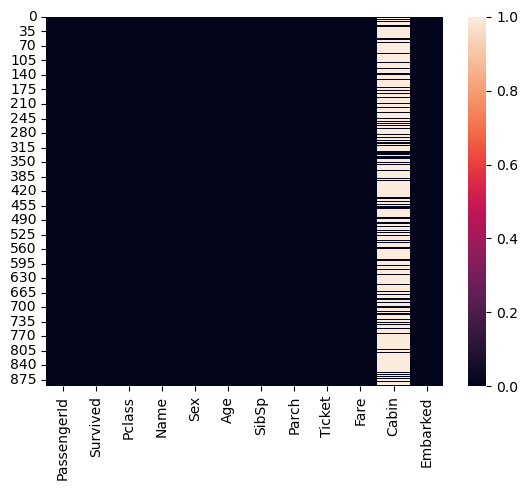

In [8]:
sns.heatmap(titanic.isna())

In [9]:
#Dropping the column named (Cabin) 
titanic.drop("Cabin" , axis = 1 , inplace = True)

In [10]:
#Displaying the first 5 rows in the dataset 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
#checking the information of the data again , to ensure that we don't have missing values 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
#Displaying the unique values in colunm named (Sex) and the count of each unique value
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
#Displaying the unique values in colunm named (Sex) and the count of each unique value
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
#Converting the categorical values in column named (Sex) into numbers 
sex = pd.get_dummies(titanic["Sex"],drop_first=True)

In [15]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [16]:
#Converting the categorical values in column named (Embarked) into numbers 
emb = pd.get_dummies(titanic["Embarked"])

In [17]:
emb

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [18]:
#Concatenate the new columns with the original dataset 
titanic = pd.concat([titanic,sex,emb] , axis = 1 )

In [19]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,1,0,0


In [20]:
#Dropping the columns we don't need anymore
titanic.drop(["PassengerId" , "Name" ,"Sex" , "Ticket" , "Embarked"] , axis = 1 ,inplace = True)

In [21]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0,0


In [22]:
titanic.rename({"male" : "Gender"} , axis =1 ,inplace = True)

In [23]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0,0


<Axes: xlabel='Survived', ylabel='count'>

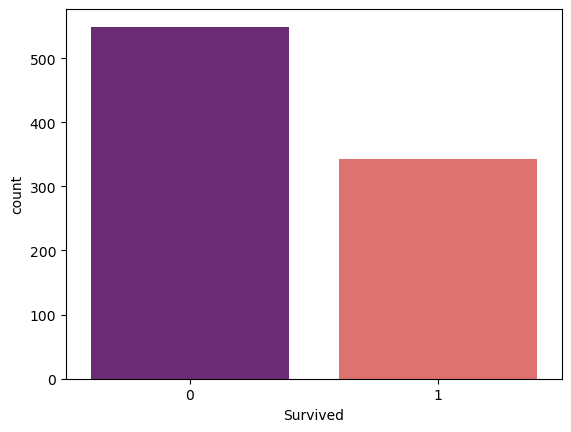

In [24]:
#Visualize the count of Survived and not Survived
sns.countplot(x= "Survived" , data = titanic , palette = "magma")

<Axes: xlabel='Survived', ylabel='count'>

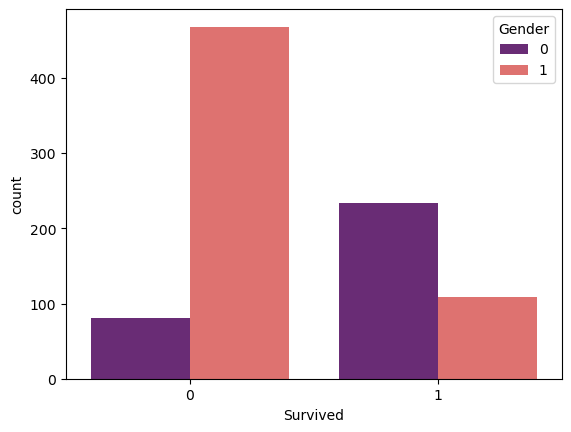

In [25]:
#Visualize the count of Survived and not Survived and splitted by gender
sns.countplot(x= "Survived" , hue = "Gender" ,  data = titanic , palette = "magma" ) 

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

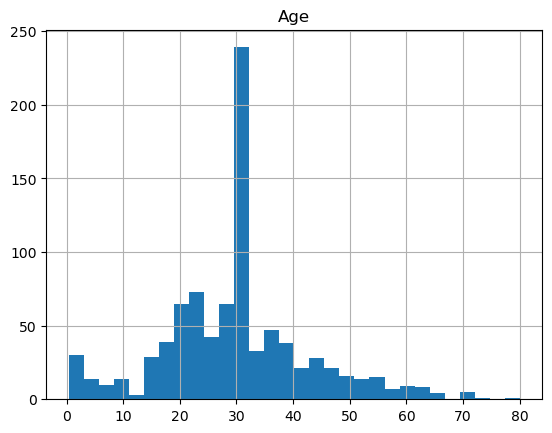

In [26]:
#Visualize the histogram of the column named (Age)
titanic.hist("Age" , bins=30) 

array([[<Axes: title={'center': 'Fare'}>]], dtype=object)

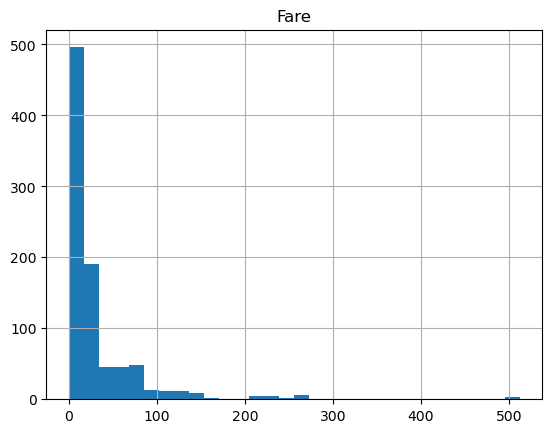

In [27]:
#Visualize the histogram of the column named (Fare)
titanic.hist("Fare" , grid = True , bins=30)

In [28]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

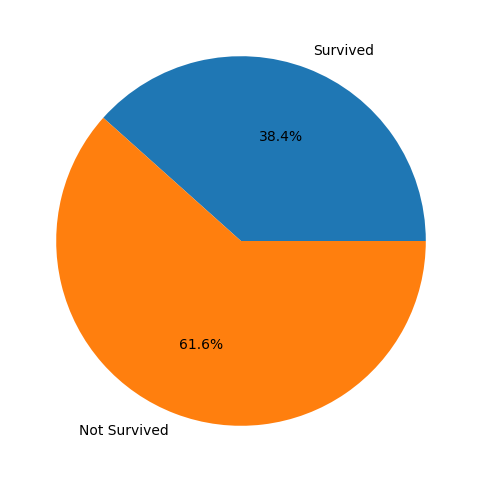

In [29]:
#Drowing Pie chart of the count of survived people and non survived
survived_counts = [342, 549]
labels = ['Survived', 'Not Survived']
plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%')
plt.show()

In [30]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0,0


# Building Model 

In [31]:
X = titanic.drop(["Survived"]  , axis = 1 )
y = titanic["Survived"]

In [32]:
X

,Pclass,Age,SibSp,Parch,Fare,Gender,C,Q,S
0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,38.000000,1,0,71.2833,0,1,0,0
2,3,26.000000,0,0,7.9250,0,0,0,1
3,1,35.000000,1,0,53.1000,0,0,0,1
4,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,0,1
887,1,19.000000,0,0,30.0000,0,0,0,1
888,3,29.699118,1,2,23.4500,0,0,0,1
889,1,26.000000,0,0,30.0000,1,1,0,0


In [33]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print("X_train : shape" , X_train.shape)
print("y_train : shape" , y_train.shape)
print("X_test : shape" , X_test.shape)
print("y_test : shape" , y_test.shape)

X_train : shape (712, 9)
y_train : shape (712,)
X_test : shape (179, 9)
y_test : shape (179,)


In [36]:
model = LogisticRegression(max_iter = 5000) #Model Building

In [37]:
model.fit(X_train , y_train) #Model Training

LogisticRegression(max_iter=5000)

In [38]:
y_pred = model.predict(X_test) #Model Predicting

In [39]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [40]:
y_test.values

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1], dtype=int64)

In [41]:
cm = confusion_matrix(y_test , y_pred)

<Axes: >

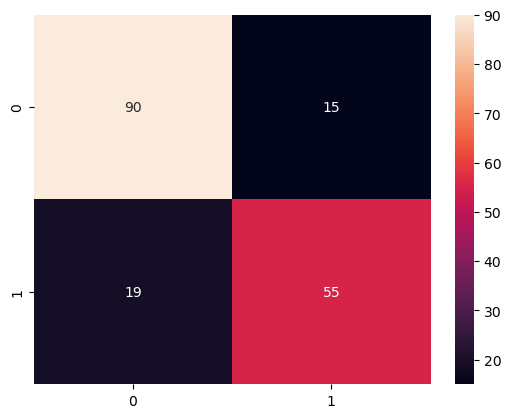

In [42]:
sns.heatmap(cm , annot = True)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [44]:
model.score(X_train , y_train)

0.8019662921348315

In [45]:
model.score(X_test , y_test)

0.8100558659217877

# Thank you